In [18]:
!pip3 install GetOldTweets3

In [19]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [20]:
nltk.download('vader_lexicon')
import string
from collections import Counter
import GetOldTweets3 as got
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
import matplotlib.pyplot as plt
!git clone https://github.com/smfcoder/Sentiment-Analysis.git

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
fatal: destination path 'Sentiment-Analysis' already exists and is not an empty directory.


In [21]:
def get_tweets():
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('UdaySamant') \
        .setSince("2020-01-01") \
        .setUntil("2020-08-8") \
        .setMaxTweets(700)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets




Counter({' happy': 3, ' average': 2, ' esteemed': 2, ' attracted': 1, ' safe': 1, ' surprise': 1, ' fearless': 1, ' ecstatic': 1, ' powerless': 1, ' free': 1, ' lost': 1, ' adequate': 1, ' independent': 1, ' sad': 1, ' fearful': 1})


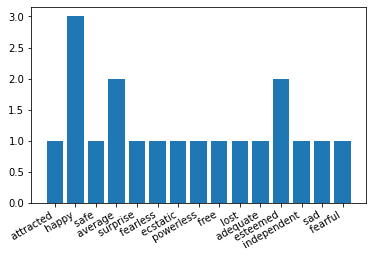

Positive Sentiment


In [22]:
text = ""
text_tweets = get_tweets()
length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# splitting text into words
tokenized_words = word_tokenize(cleaned_text, "english")

# Removing stop words from the tokenized words list
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

# Get emotions text
emotions = []
with open('/content/Sentiment-Analysis/emotion.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotions.append(emotion)

count = Counter(emotions)
print(count)

#visualising
fig, ax1 = plt.subplots()
ax1.bar(count.keys(), count.values())
fig.autofmt_xdate()
plt.show()


#PolarityScore:
def sentiment_analyze(cleaned_text1):
    score = sia().polarity_scores(cleaned_text1)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    if score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")
    
    
sentiment_analyze(cleaned_text)

